## I need:
1. Closing price daily
2. EPS
3. Actual vs estimated stock price of current

### 1. Closing Price Daily

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


ModuleNotFoundError: No module named '_matplotlib'

In [7]:
stock = yf.Ticker("aapl")
df = stock.history(period="1y")  # Get past 1 year of daily prices
print(df.tail())  # Print the last 5 rows of the dataframe

                                 Open        High         Low       Close  \
Date                                                                        
2025-03-07 00:00:00-05:00  235.110001  241.369995  234.759995  239.070007   
2025-03-10 00:00:00-04:00  235.539993  236.160004  224.220001  227.479996   
2025-03-11 00:00:00-04:00  223.809998  225.839996  217.449997  220.839996   
2025-03-12 00:00:00-04:00  220.139999  221.750000  214.910004  216.979996   
2025-03-13 00:00:00-04:00  215.949997  216.839996  208.419998  209.679993   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-03-07 00:00:00-05:00  46273600        0.0           0.0  
2025-03-10 00:00:00-04:00  72071200        0.0           0.0  
2025-03-11 00:00:00-04:00  76137400        0.0           0.0  
2025-03-12 00:00:00-04:00  62547500        0.0           0.0  
2025-03-13 00:00:00-04:00  61250000        0.0           0.0  


DatetimeIndex(['2024-01-29 00:00:00-05:00', '2024-01-30 00:00:00-05:00',
               '2024-01-31 00:00:00-05:00', '2024-02-01 00:00:00-05:00',
               '2024-02-02 00:00:00-05:00', '2024-02-05 00:00:00-05:00',
               '2024-02-06 00:00:00-05:00', '2024-02-07 00:00:00-05:00',
               '2024-02-08 00:00:00-05:00', '2024-02-09 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', freq=None)
None


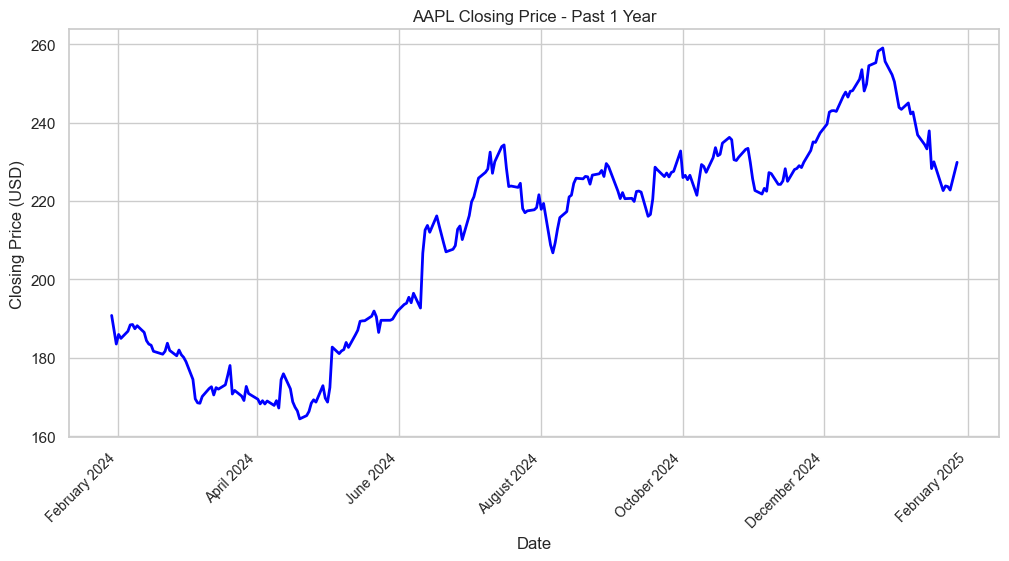

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set a Seaborn style for better visuals
sns.set(style="whitegrid")

# Plot the data
df['Close'].plot(
    figsize=(12, 6), 
    title='AAPL Closing Price - Past 1 Year', 
    color='blue', 
    linewidth=2
)
print(df.index[:10])  # Print the first 10 index values
print(df.index.inferred_freq)
# Format X-axis ticks to show every 2nd month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Set ticks every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))  # Format as "Month Year"

# Improve readability
plt.xticks(rotation=45, fontsize=10)
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")

# Show the plot
plt.show()


### 2. EPS

In [1]:
def plot_quarterly_eps(stock):
    df_quarterly = stock.get_earnings_history()

    # Display last 4-8 quarters
    df_quarterly.index = pd.to_datetime(df_quarterly.index)
    df_quarterly.index = df_quarterly.index.strftime("%B %Y")

    # Set figure size
    fig, ax = plt.subplots(figsize=(10, 6))

    # Bar width
    bar_width = 0.35

    # Create bar plots for EPS Estimate and EPS Actual
    x = np.arange(len(df_quarterly.index))
    ax.bar(x - bar_width/2, df_quarterly["epsEstimate"], width=bar_width, label="EPS Estimate", color="gray")
    ax.bar(x + bar_width/2, df_quarterly["epsActual"], width=bar_width, label="EPS Actual", color="blue")

    # Formatting x-axis labels as "Month Year"
    ax.set_xticks(x)
    ax.set_xticklabels(df_quarterly.index, rotation=45)

    # Labels and Title
    ax.set_xlabel("Quarter")
    ax.set_ylabel("Earnings Per Share (EPS)")
    ax.set_title("Quarterly EPS: Estimate vs Actual")
    ax.legend()
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    return fig

# Example usage:
fig = plot_quarterly_eps(stock)
plt.show()


NameError: name 'stock' is not defined

### 3- Actual vs Real stock price

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from PIL import Image

# Setup Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode (no GUI)
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Open the target webpage
url = "https://example.com"  # Replace with actual webpage containing the div
driver.get(url)

# Locate the div
div_element = driver.find_element(By.CLASS_NAME, "wrapper")

# Take a screenshot of the entire page
screenshot_path = "full_screenshot.png"
driver.save_screenshot(screenshot_path)

# Get div location & size
location = div_element.location
size = div_element.size

# Open the full screenshot and crop the div
image = Image.open(screenshot_path)
left = location['x']
top = location['y']
right = left + size['width']
bottom = top + size['height']

cropped_image = image.crop((left, top, right, bottom))
cropped_image.save("div_screenshot.png")  # Save the cropped image

# Close the driver
driver.quit()


In [38]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import io

def generate_stock_images(ticker_symbol="AAPL"):
    # Fetch stock data
    stock = yf.Ticker(ticker_symbol)

    # Get historical stock prices (daily, weekly, monthly)
    stock_data_daily = stock.history(period="3mo", interval="1d")  # 3 months daily
    stock_data_weekly = stock.history(period="6mo", interval="1wk")  # 6 months weekly
    stock_data_monthly = stock.history(period="1y", interval="1mo")  # 1 year monthly

    # Get earnings per quarter
    earnings_data = stock.get_earnings_history()['epsActual']

    # Dictionary to store image buffers
    image_buffers = {}

    # Function to save plots in memory
    def save_plot_to_memory(fig, name):
        img_buffer = io.BytesIO()
        fig.savefig(img_buffer, format='png', bbox_inches='tight')
        img_buffer.seek(0)
        image_buffers[name] = img_buffer
        plt.close(fig)  # Close the figure to free memory

    # Plot 1: Stock Price (Daily)
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(stock_data_daily.index, stock_data_daily["Close"], '-o', label="Daily Price")
    ax.set_title(f"{ticker_symbol} Stock Price (Daily)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price (USD)")
    ax.grid()
    ax.legend()
    save_plot_to_memory(fig, "daily")

    # Plot 2: Stock Price (Weekly)
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(stock_data_weekly.index, stock_data_weekly["Close"], '-o', label="Weekly Price")
    ax.set_title(f"{ticker_symbol} Stock Price (Weekly)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price (USD)")
    ax.grid()
    ax.legend()
    save_plot_to_memory(fig, "weekly")

    # Plot 3: Stock Price (Monthly)
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(stock_data_monthly.index, stock_data_monthly["Close"], '-o', label="Monthly Price")
    ax.set_title(f"{ticker_symbol} Stock Price (Monthly)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price (USD)")
    ax.grid()
    ax.legend()
    save_plot_to_memory(fig, "monthly")

    # Plot 4: Earnings Per Quarter
    fig, ax = plt.subplots(figsize=(8, 5))
    earnings_data.plot(ax=ax, color='blue')
    ax.set_title(f"{ticker_symbol} Earnings Per Quarter")
    ax.set_xlabel("Quarter")
    ax.set_ylabel("Net Income (USD)")
    ax.grid()
    save_plot_to_memory(fig, "earnings")
    plt.show()
    return image_buffers  # Returns dictionary of images


Showing image: daily


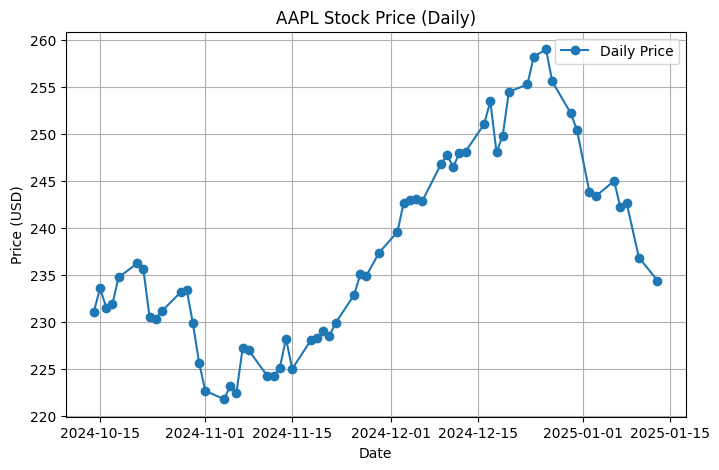

Showing image: weekly


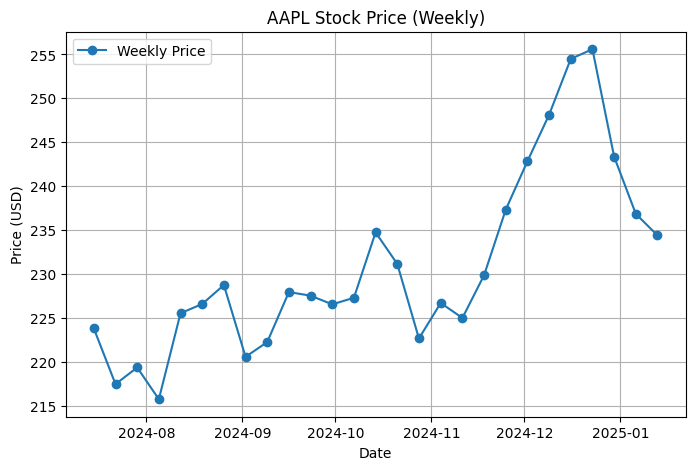

Showing image: monthly


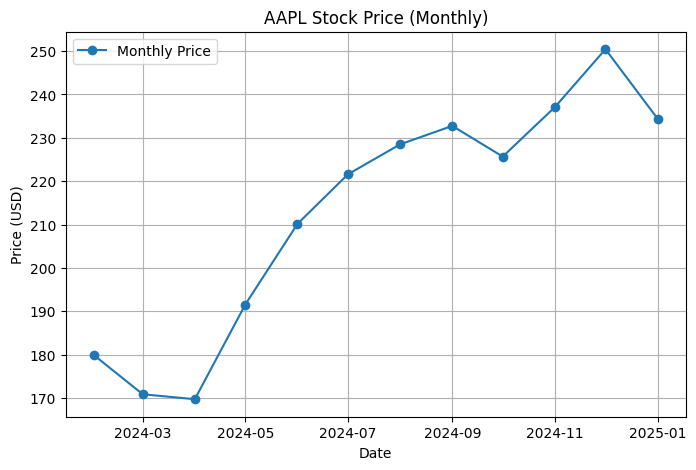

Showing image: earnings


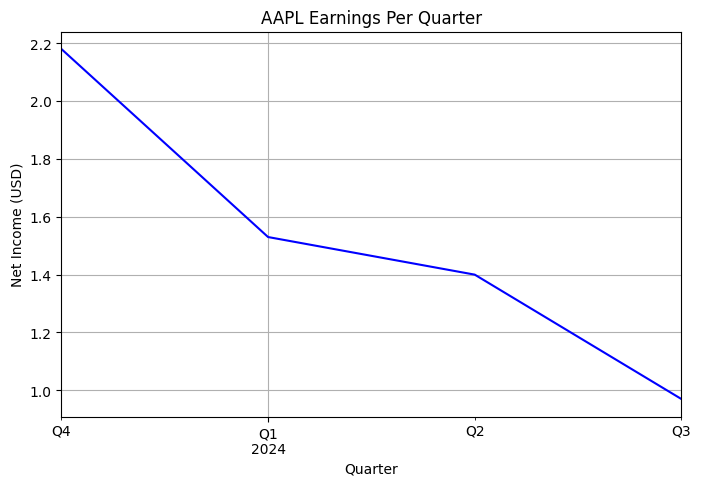

In [39]:
from PIL import Image

images = generate_stock_images("AAPL")
# Display each image
for name, img_buffer in images.items():
    print(f"Showing image: {name}")
    display(Image.open(img_buffer)) 